#### Predicting Survival in the Titanic Data Set

We will be using a decision tree to make predictions about the Titanic data
set from Kaggle. This data set provides information on the Titanic
passengers and can be used to predict whether a passenger survived or
not.

In [31]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [3]:
url = 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'

titanic = pd.read_csv(url)    

In [4]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
data = titanic[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Survived"]]

In [6]:
data

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,0
887,1,female,19.0,0,0,30.0000,1
888,3,female,NaN,1,2,23.4500,0
889,1,male,26.0,0,0,30.0000,1


In [7]:
data.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Survived      0
dtype: int64

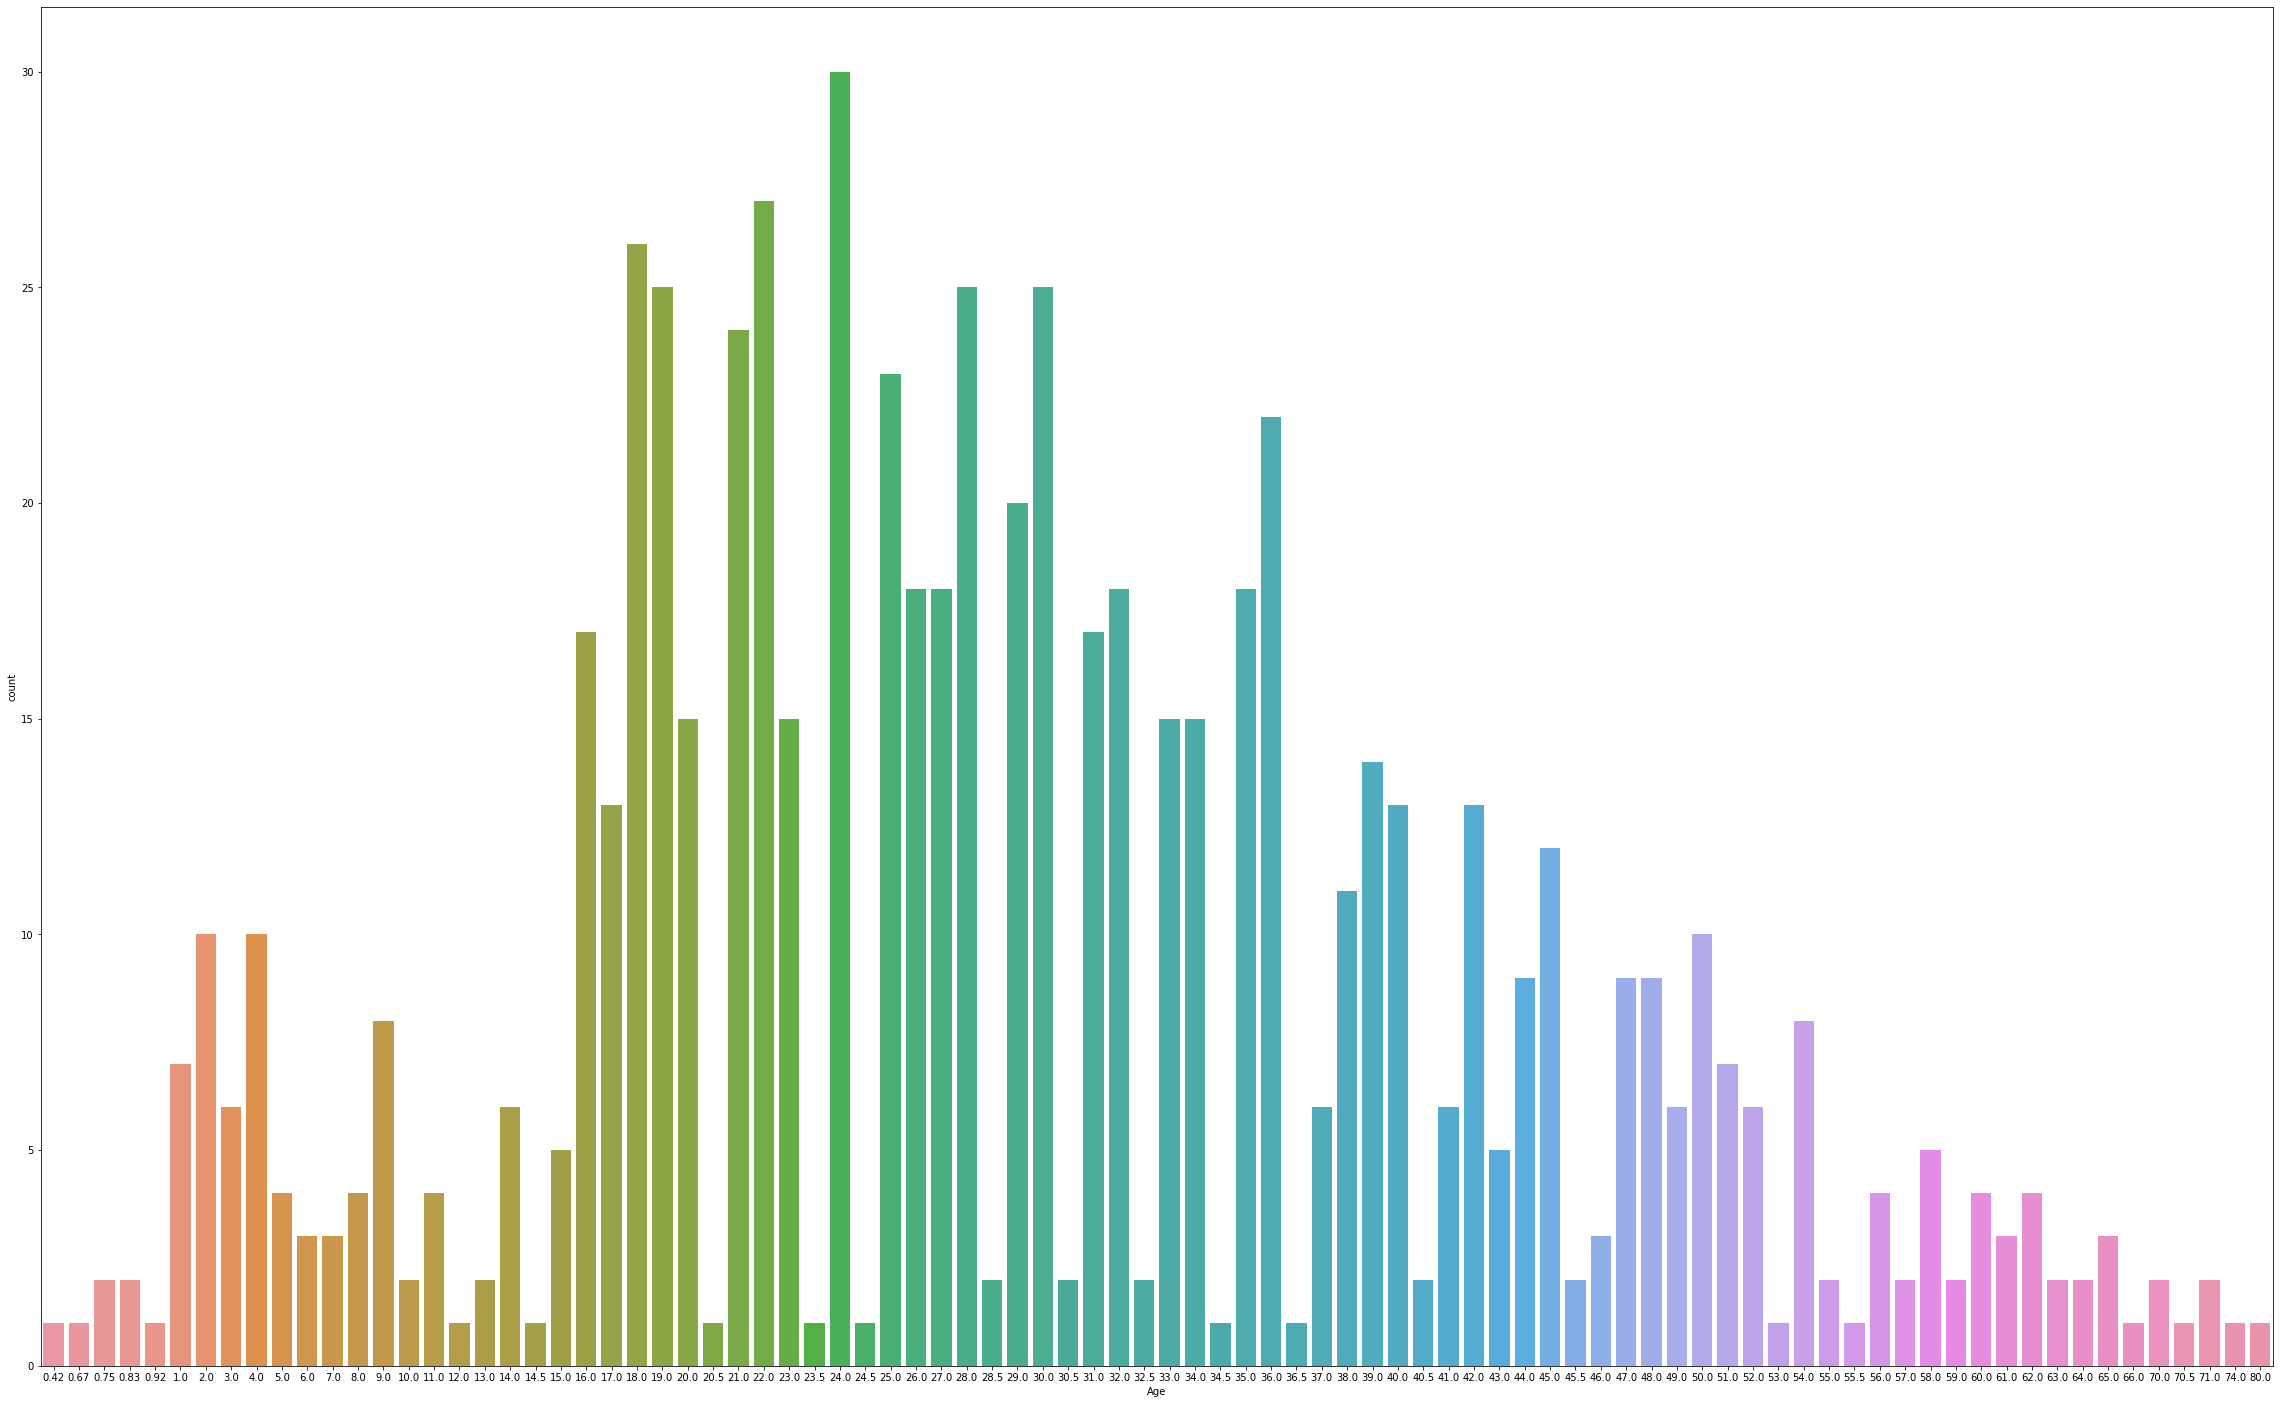

In [8]:
plt.figure(figsize=(40,25))
sb.countplot(x="Age", data=data)

In [25]:
data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### Dropping the null values

In [9]:
data.dropna(inplace=True)

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
data

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,male,22.0,1,0,7.2500,0
1,1,female,38.0,1,0,71.2833,1
2,3,female,26.0,0,0,7.9250,1
3,1,female,35.0,1,0,53.1000,1
4,3,male,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
885,3,female,39.0,0,5,29.1250,0
886,2,male,27.0,0,0,13.0000,0
887,1,female,19.0,0,0,30.0000,1
889,1,male,26.0,0,0,30.0000,1


In [11]:
data.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,2.236695,29.699118,0.512605,0.431373,34.694514,0.406162
std,0.838250,14.526497,0.929783,0.853289,52.918930,0.491460
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,20.125000,0.000000,0.000000,8.050000,0.000000
50%,2.000000,28.000000,0.000000,0.000000,15.741700,0.000000
75%,3.000000,38.000000,1.000000,1.000000,33.375000,1.000000
max,3.000000,80.000000,5.000000,6.000000,512.329200,1.000000


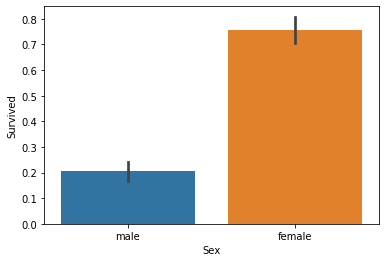

In [12]:
sb.barplot(x='Sex',y='Survived',data=data)

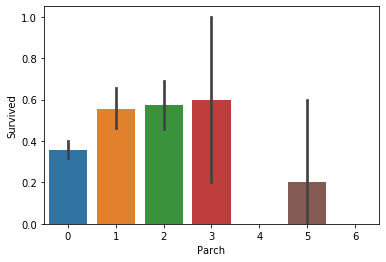

In [13]:
sb.barplot(x='Parch',y='Survived',data=data)

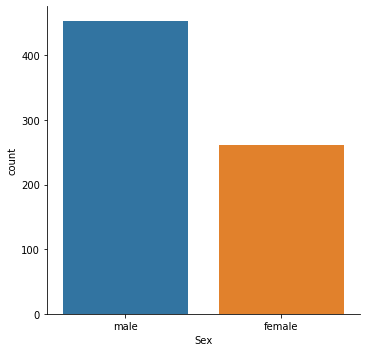

In [14]:
sb.catplot(x="Sex", data=data, kind='count')

In [25]:
# For categorical variables
data.replace({'Sex': {'male': 0, 'female': 1}}, inplace=True)

C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\core\generic.py:6702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


In [26]:
data

,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...
885,3,1,39.0,0,5,29.1250,0
886,2,0,27.0,0,0,13.0000,0
887,1,1,19.0,0,0,30.0000,1
889,1,0,26.0,0,0,30.0000,1


In [27]:
X = data.drop(columns = 'Survived')
y = data['Survived']

In [28]:
# let's see how well our model perform on this new data
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 355)
#let's first visualize the tree on the data without doing any pre processing

clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.7348837209302326

In [29]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [32]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [33]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [34]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 8, 'splitter': 'random'}


In [35]:
grid_search.best_score_

0.8217171717171716

In [36]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =18, min_samples_leaf= 1, min_samples_split= 8, splitter ='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=18, min_samples_split=8,
                       splitter='random')

In [37]:
clf.score(x_test,y_test)

0.813953488372093

In [ ]:
# let's save the model
import pickle

with open('C:/Users/ASUS/Models/Decision tree'+ '/modelForPrediction.sav', 'wb') as f:
    pickle.dump(clf,f)
    
with open('C:/Users/ASUS/Models/Decision tree'+ '/standardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

with open('C:/Users/ASUS/Models/Decision tree'+ '/pca_model.sav', 'wb') as f:
    pickle.dump(pca,f)